In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

In [ ]:
train=pd.read_csv("/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/train_set.csv",index_col=0)
test=pd.read_csv("/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/test_set.csv",index_col=0)
valid=pd.read_csv("/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/valid_set.csv",index_col=0)

## Neural Networks Regression

In [ ]:
#keras regression
X_train = StandardScaler().fit_transform(train[var])

In [ ]:
# custom R2-score metrics for keras backend
from keras import backend as K

def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=34, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.05))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2])
# fit model
history = model.fit(train[var], train['max_lap'], validation_data=(test[var], test['max_lap']), epochs=50, verbose=0)

In [ ]:
# evaluate the model
train_mse = model.evaluate(train[var], train['max_lap'], verbose=0)
test_mse = model.evaluate(test[var], test['max_lap'], verbose=0)
print(train_mse, test_mse)

[26.18968963623047, 0.8352716565132141] [25.357315063476562, 0.8417461514472961]


## Visualization of predictions for 2 sample races

In [ ]:
sample=pd.read_csv("/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/sample_race.csv",index_col=0)

In [ ]:
sample['pred'] = model.predict(sample[var])

In [ ]:
sample[['max_lap','pred','LAP_NUMBER','keys']].copy()

,max_lap,pred,LAP_NUMBER,keys
21136,37,32.634521,1,25JEAN-ERIC VERGNERaceSantiago2017-2018
21137,37,34.774860,2,25JEAN-ERIC VERGNERaceSantiago2017-2018
21138,37,33.697765,3,25JEAN-ERIC VERGNERaceSantiago2017-2018
21139,37,35.342735,4,25JEAN-ERIC VERGNERaceSantiago2017-2018
21140,37,33.598072,5,25JEAN-ERIC VERGNERaceSantiago2017-2018
...,...,...,...,...
28907,47,42.753799,43,66DANIEL ABTRaceMexico city2017-2018
28908,47,42.712086,44,66DANIEL ABTRaceMexico city2017-2018
28909,47,42.709076,45,66DANIEL ABTRaceMexico city2017-2018
28910,47,42.710102,46,66DANIEL ABTRaceMexico city2017-2018


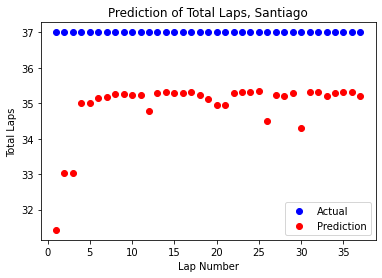

In [ ]:
ax = plt.gca()

ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], sample['max_lap'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], color="b",label='Actual')
ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], sample['pred'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], color="r", label="Prediction")

ax.set_xlabel('Lap Number')  # Add an x-label to the axes.
ax.set_ylabel('Total Laps')  # Add a y-label to the axes.
ax.set_title("Prediction of Total Laps, Santiago")  # Add a title to the axes.
ax.legend()

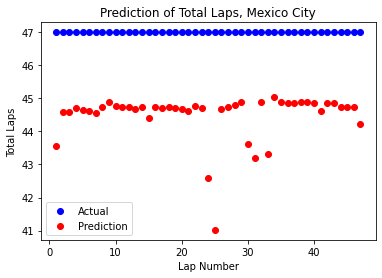

In [ ]:
ax = plt.gca()

ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], sample['max_lap'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], color="b",label='Actual')
ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], sample['pred'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], color="r",label='Prediction')
ax.set_xlabel('Lap Number')  
ax.set_ylabel('Total Laps') 
ax.set_title("Prediction of Total Laps, Mexico City")  
ax.legend()

In [ ]:
sample['remain']=sample['max_lap']-sample['LAP_NUMBER']-1
sample['remain_pred']=sample['pred']-sample['LAP_NUMBER']-1

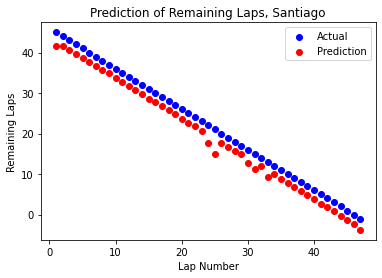

In [ ]:
ax = plt.gca()

ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], sample['remain'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], color="b",label='Actual')
ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], sample['remain_pred'].loc[sample['keys']=="66DANIEL ABTRaceMexico city2017-2018"], color="r",label='Prediction')
ax.set_xlabel('Lap Number')  
ax.set_ylabel('Remaining Laps')  
ax.set_title("Prediction of Remaining Laps, Santiago")  
ax.legend()

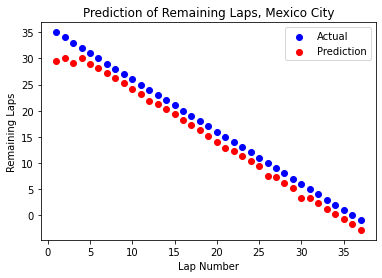

In [ ]:
ax = plt.gca()

ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], sample['remain'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], color="b",label='Actual')
ax.scatter(sample['LAP_NUMBER'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], sample['remain_pred'].loc[sample['keys']=="25JEAN-ERIC VERGNERaceSantiago2017-2018"], color="r",label='Prediction')
ax.set_xlabel('Lap Number')  
ax.set_ylabel('Remaining Laps')  
ax.set_title("Prediction of Remaining Laps, Mexico City")  
ax.legend()